we'll be implementing naive approach for digit recognition by one vs all classification by using logistic regression

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
#fetching data
data=pd.read_csv('F:\coursera_,ml\machine-learning-ex3\ex3\\train.csv',sep=',')

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train=data.iloc[:35000,1:]
y_train=data.iloc[:35000,0]

In [5]:
x_train=x_train.as_matrix()
y_train=y_train.as_matrix()

In [6]:
f=x_train[613].reshape(28,28)

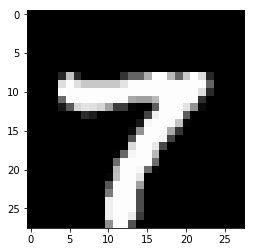

In [7]:
#visualizing the data
plt.gray()
plt.imshow(f)
plt.show()

In [8]:
x_t=np.c_[np.ones((len(x_train),1)),x_train]
y_train=y_train.reshape((len(y_train),1))

In [9]:
y_t=np.zeros((len(y_train),10))
for i in range(10):
    for j in range(len(y_train)):
        if y_train[j]==i:
            y_t[j,i]=1

In [22]:
t=np.zeros((785,10))         #initializing parameters
alpha=0.03                   #setting the learning rate
j_history=np.zeros((1500,10))

In [11]:
#sigmoid function
def sig(x):
    s=1/(1+np.exp(-1*x))
    return s

In [12]:
#cost function
def cost(x,y,t):
    h=sig(np.dot(x,t))
    j=(-1/len(y))*(np.dot(np.log(h).T,y)+np.dot(np.log(1-h).T,1-y))
    if np.isnan(j[0]):
        return(np.inf)
    return(j[0])

In [13]:
#flattening the features
x_t[:,1:]=x_t[:,1:]/255

In [23]:
for i in range(10):
    c=0
    for k in range(1500):
        tic=time.clock()
        h=sig(np.dot(x_t,t[:,i,None]))
        q=h-y_t[:,i,None]
        t[:,i,None]=t[:,i,None]-(alpha/len(x_t))*(np.dot(x_t.T,q))
        j=cost(x_t,y_t[:,i,None],t[:,i,None])
        j_history[k,i]=j
        c=c+1
        toc=time.clock()-tic
        if c%500==0 or c==1:
            print('epoch '+str(i)+':'+str(c)+' Time:'+str(toc)+ ' cost:'+str(j_history[k,i]))

epoch 0:1 Time:0.09676683204600067 cost:0.547548413141
epoch 0:500 Time:0.054720072639725004 cost:0.0680187867422
epoch 0:1000 Time:0.060126998769590045 cost:0.0537427109175
epoch 0:1500 Time:0.06392319701717497 cost:0.0474615630112
epoch 1:1 Time:0.06037331697649506 cost:0.521626245577
epoch 1:500 Time:0.06610383761352523 cost:0.0615328285285
epoch 1:1000 Time:0.06461868371894752 cost:0.0491975285213
epoch 1:1500 Time:0.06719596907498726 cost:0.0440842082418
epoch 2:1 Time:0.06346255782136723 cost:0.547087671073
epoch 2:500 Time:0.06879160393003758 cost:0.121921730166
epoch 2:1000 Time:0.055043667146833286 cost:0.103611820472
epoch 2:1500 Time:0.05761370784966857 cost:0.095873105722
epoch 3:1 Time:0.057246041702683215 cost:0.549314846891
epoch 3:500 Time:0.05727924636289572 cost:0.13799439914
epoch 3:1000 Time:0.05792220932937653 cost:0.120608762458
epoch 3:1500 Time:0.058672030929869834 cost:0.113081424067
epoch 4:1 Time:0.0596234953760586 cost:0.534779666355
epoch 4:500 Time:0.06910

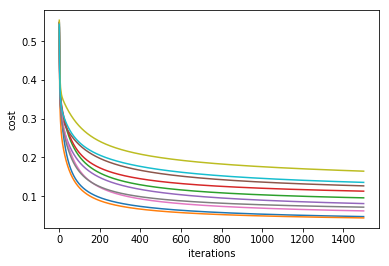

In [24]:
#cost for each class vs iteration graph
xa=np.arange(1,1501,1)
for i in range(10):
    plt.plot(xa,j_history[:,i])
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [25]:
x_test=data.iloc[35000:,1:]
y_test=data.iloc[35000:,0]

In [26]:
x_test=x_test.as_matrix()
y_test=y_test.as_matrix()

In [27]:
x_test=x_test/255

In [28]:
x_te=np.c_[np.ones((len(x_test),1)),x_test]
y_test=y_test.reshape((len(y_test),1))

In [29]:
pre=sig(np.dot(x_te,t))

In [30]:
ans=np.zeros((len(y_test),1))

In [31]:
for i in range(7000):
    ans[i]=np.argmax(pre[i])

In [32]:
ans

array([[ 2.],
       [ 2.],
       [ 5.],
       ..., 
       [ 7.],
       [ 6.],
       [ 9.]])

In [33]:
y_test

array([[2],
       [2],
       [5],
       ..., 
       [7],
       [6],
       [9]], dtype=int64)

In [34]:
c=0
for i in range(7000):
    if y_test[i,0]==ans[i,0]:
        c=c+1

In [35]:
print(str((c/7000)*100)+'%')

88.31428571428572%


so obtained accuracy over the test dataset by using lostic regression is 88% which is quite low in comparision to other models.